#Assignment 1
Mitchell Nursey <br>
V00884763



### Imports

In [1]:
import numpy as np
import IPython.display as ipd
import math
import IPython
import sys
import pyaudio

import time
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

In [2]:
def plot(data_list): 
    fig, ax = plt.subplots(figsize=(4,3))
    for data in data_list: 
        plt.plot(data)

### Question 1

In [3]:
# Create array
# 3 seconds in length
# 440 Hz
# Sinwave
# 44100 samples per second

srate = 44100
duration = 3
freq = 440

t = np.linspace(0, duration, srate * duration)
data = np.sin(2 * np.pi * freq * t)

# Play the sound
ipd.Audio(data, rate=srate)

### Question 2

In [4]:
def sinewave(frequency, duration=1, srate=44100):
  t = np.arange(0, duration, 1/srate)
  data = np.sin(2 * np.pi * frequency * t)
  return data

def midi_to_freq(midi_note_number):
  # Assuming equal tuning based on A4=a'=440 Hz
  return 440.0 * pow(2.0, (midi_note_number - 69.0) / 12.0)


note_C = 60
note_G = 67
note_F = 65
note_E = 64
note_D = 62
note_C_up = 72
note_C_down = 48
note_A = 69

# CGFEDC^G
# FEDC^G
# FEFD

# CGFEDC*G
# FEDC*G
# FEFD

playbackspeed = 1.5

long_note = 1.25 / playbackspeed
reg_note = 1 / playbackspeed
short_note = 0.75 / playbackspeed

data = np.concatenate(
    (
      # first part
      sinewave(midi_to_freq(note_C), reg_note), 
      sinewave(midi_to_freq(note_G), long_note), 
      sinewave(midi_to_freq(note_F), short_note), 
      sinewave(midi_to_freq(note_E), short_note), 
      sinewave(midi_to_freq(note_D), short_note),
      sinewave(midi_to_freq(note_C_up), reg_note),
      sinewave(midi_to_freq(note_G), short_note),
     
      # second part
      sinewave(midi_to_freq(note_F), short_note), 
      sinewave(midi_to_freq(note_E), short_note), 
      sinewave(midi_to_freq(note_D), short_note),
      sinewave(midi_to_freq(note_C_up), reg_note),
      sinewave(midi_to_freq(note_G), short_note),
     
     # third part
      sinewave(midi_to_freq(note_F), short_note), 
      sinewave(midi_to_freq(note_E), short_note), 
      sinewave(midi_to_freq(note_F), short_note),
      sinewave(midi_to_freq(note_D), long_note),
     
      # fourth part
      sinewave(midi_to_freq(note_C), reg_note), 
      sinewave(midi_to_freq(note_G), long_note), 
      sinewave(midi_to_freq(note_F), short_note), 
      sinewave(midi_to_freq(note_E), short_note), 
      sinewave(midi_to_freq(note_D), short_note),
      sinewave(midi_to_freq(note_C_down), reg_note),
      sinewave(midi_to_freq(note_G), short_note),
     
      # fifth part
      sinewave(midi_to_freq(note_F), short_note), 
      sinewave(midi_to_freq(note_E), short_note), 
      sinewave(midi_to_freq(note_D), short_note),
      sinewave(midi_to_freq(note_C_down), reg_note),
      sinewave(midi_to_freq(note_G), short_note),
     
     # sixth part
      sinewave(midi_to_freq(note_F), short_note), 
      sinewave(midi_to_freq(note_E), short_note), 
      sinewave(midi_to_freq(note_F), short_note),
      sinewave(midi_to_freq(note_D), long_note),
    )
)

ipd.Audio(data, rate=44100)

This should sound like star wars

### Question 3

####Simple score language:

Time is an float
Note is a MIDI note number
Duration is a float

Write the scoring language in JSON 😆

####Format:
`[TIME, NOTE, DURATION]`


Each note will be passed in an array

Example: 
```
score_data = [
  [0.0, 60, 1],
  [1.0, 67, 1],
  [2.0, 64, 0.5],
]
```

In [5]:
def process_score(score_data, srate=44100):

  # compute total length of data
  duration = 0
  for note in score_data:
    if note[0] + note[2] > duration:
      duration = note[0] + note[2]

  # create array with this length
  data = np.zeros(math.ceil(srate * duration))

  # for every note, create sin wave
  for note in score_data:
    note_data = sinewave(midi_to_freq(note[1]), note[2])

    offset_index = math.floor(note[0] * srate)
    for sample in note_data:
      data[offset_index] += sample
      offset_index += 1
    
    
  # add this wave to data offset by its time

  # return data
  return data

# lets create star wars.. but broken ;P 
ipd.Audio(process_score(
    [
      [0, note_C, 1],
      [1, note_G, 1],
      [2, note_F, 1],
      [3, note_E, 1],
      [4, note_D, 1],
      [5, note_C_up, 1],
      [6, note_G, 1],
     
      [7, note_F, 1],
      [8, note_E, 1],
      [9, note_D, 1],
      [10, note_C_up, 1],
      [11, note_G, 1],
     
      [12, note_F, 1],
      [13, note_E, 1],
      [14, note_F, 1],
      [15, note_D, 1],
     
      [8, note_C, 2],
      [9, note_G, 2],
      [10, note_F, 2],
      [11, note_E, 2],
      [12, note_D, 2],
      [13, note_C_up, 2],
      [14, note_G, 2],
     
      [15, note_F, 2],
      [16, note_E, 2],
      [17, note_D, 2],
      [18, note_C_up, 2],
      [19, note_G, 2],
     
      [20, note_F, 2],
      [21, note_E, 2],
      [22, note_F, 2],
      [23, note_D, 2],
     
      # example of a rest
      [28, note_D, 2],
      [28, note_D, 2],
    ],

), rate=44100)

This should sound like star wars (once again), but I have it modified to show that multiple notes can be played at once.

I've also shown an example of a rest (by not playing any notes).

### Question 4

In [6]:
def sawtooth(frequency, duration=1, srate=44100):
  t = np.arange(0, duration, 1/srate)
  data = 2 * ( (t*frequency) - np.floor(0.5 + (t*frequency)))
  
  return data

def pulse(frequency, duration=1, srate=44100):
  t = np.arange(0, duration, 1/srate)
  data = np.round(np.sin(2 * np.pi * frequency * t) > 0)
  return data

def triangle(frequency, duration=1, srate=44100):
  t = np.arange(0, duration, 1/srate)
  data = 2 * np.abs(2.0 *((t*frequency) - np.floor(0.5 + (t*frequency)))) - 1.0
  return data

def noise(duration=1, srate=44100):
  t = np.arange(0, duration, 1/srate)
  t *= 0
  t += np.random.normal(0,1,t.shape)
  return t

sound = sinewave(220)
IPython.display.display(IPython.display.Markdown(data="##SINE"))
IPython.display.display(IPython.display.Audio(sound, rate=44100))

sound = sawtooth(220)
IPython.display.display(IPython.display.Markdown(data="##SAW"))
IPython.display.display(IPython.display.Audio(sound, rate=44100))

sound = pulse(220)
IPython.display.display(IPython.display.Markdown(data="##PULSE"))
IPython.display.display(IPython.display.Audio(sound, rate=44100))

sound = triangle(220)
IPython.display.display(IPython.display.Markdown(data="##TRIANGLE"))
IPython.display.display(IPython.display.Audio(sound, rate=44100))

sound = noise()
IPython.display.display(IPython.display.Markdown(data="##NOISE"))
IPython.display.display(IPython.display.Audio(sound, rate=44100))

##SINE

##SAW

##PULSE

##TRIANGLE

##NOISE

### Question 5 / 6

In [7]:
import wave

In [12]:
def sinewave(t, freq):
    return np.sin(2 * np.pi * freq * t).astype(np.float32)

def sawtooth(t, frequency):
  return 2 * ( (t*frequency) - np.floor(0.5 + (t*frequency))).astype(np.float32)
  
def pulse(t, frequency):
  return np.round(np.sin(2 * np.pi * frequency * t) > 0).astype(np.float32)

def triangle(t, frequency):
  return (2 * np.abs(2.0 *((t*frequency) - np.floor(0.5 + (t*frequency)))) - 1.0).astype(np.float32)

def noise(t, freq):
  t = np.copy(t)
  t *= 0
  t += np.random.normal(0,1,t.shape)
  return t

# Updated format for note system:
# [time start, note (midi number), duration, phase, wave function]
notes = [
  [0, note_G, 1, 0.0, sinewave],
  [0, note_C, 5, 0.0, sinewave],
  [1, note_G, 1, 0.0, sinewave],
  [2, note_F, 2, 0.0, sinewave],
  [3, note_E, 1, 0.0, sinewave],
  [4, note_D, 1, 0.0, sinewave],
  [5, note_C_up, 1, 0.0, sinewave],
  [6, note_G, 1, 0.0, sinewave],
  
  [7, note_F, 1, 0.0, sawtooth],
  [8, note_E, 1, 0.0, pulse],
  [9, note_D, 1, 0.0, sinewave],
  [10, note_C_up, 1, 0.0, sinewave],
  [11, note_G, 1, 0.0, sinewave],
  
  [12, note_F, 1, 0.0, noise],
  [13, note_E, 1, 0.0, sinewave],
  [14, note_F, 1, 0.0, sinewave],
  [15, note_D, 1, 0.0, sinewave],
  
  [16, note_E, 1, 0.0, sinewave],
  [17, note_D, 1, 0.0, sinewave],
  [18, note_C_up, 1, 0.0, sinewave],
  [19, note_G, 1, 0.0, sinewave],
  
  [20, note_F, 1, 0.0, sinewave],
  [21, note_E, 1, 0.0, sinewave],
  [22, note_F, 1, 0.0, sinewave],
  [23, note_D, 1, 0.0, sinewave],
]

srate = 44100
freq = 440

k = 0.0

output = np.empty([1])

# Define callback for playback (1)
def callback(in_data, frame_count, time_info, status):

    global srate
    global output 
    global notes
    global k

    data = np.zeros(frame_count).astype(np.float32)

    num_active_notes = 0
    for note in notes:
      
      # note start time
      n_s_time = note[0]
      # note frequency
      n_freq = midi_to_freq(note[1])
      # note duration
      n_dur = note[2]

      # note time
      n_time = note[3]

      n_fnc = note[4]

      #print(n_s_time, k,  n_s_time + n_dur)
      # if note start time has passed and note duration has not been met, play the note
      if n_s_time <= k and k < n_s_time + n_dur:
         tt = (np.arange(frame_count) / srate) + n_time

         s = n_fnc(np.copy(tt), n_freq)

         m = 0
         for value in s:
            data[m] = (data[m] + value) / 2.0
            m += 1
            
         num_active_notes += 1

         note[3] = (tt[len(tt) - 1] - tt[len(tt) - 2]) + tt[len(tt) - 1] 
              
    output = np.concatenate((output, data))

    k += frame_count * (1.0/srate) 

    return (data, pyaudio.paContinue)

# Instantiate PyAudio and initialize PortAudio system resources (2)
p = pyaudio.PyAudio()

sample_width = 512

# Open stream using callback (3)

stream = p.open(format=pyaudio.paFloat32,
                channels=1,
                rate=srate,
                output=True,
                stream_callback=callback)

# Wait for stream to finish (4)
duration = 0
for note in notes:
  if note[0] + note[2] > duration:
    duration = note[0] + note[2]

time.sleep(duration)

# Close the stream (5)
stream.close()

# Release PortAudio system resources (6)
p.terminate()

Ideally you should hear something by playing this cell. It should be star wars (for the final time). I've modified some of the notes to use other types of waves (besides sine) as well.

### Question 7

I used Max MSP. The patch layout in files.
I found using a visual programming language quite different. I used a lot of the components from the tutorial sections to make my patch.
I found I perfer python over Max.

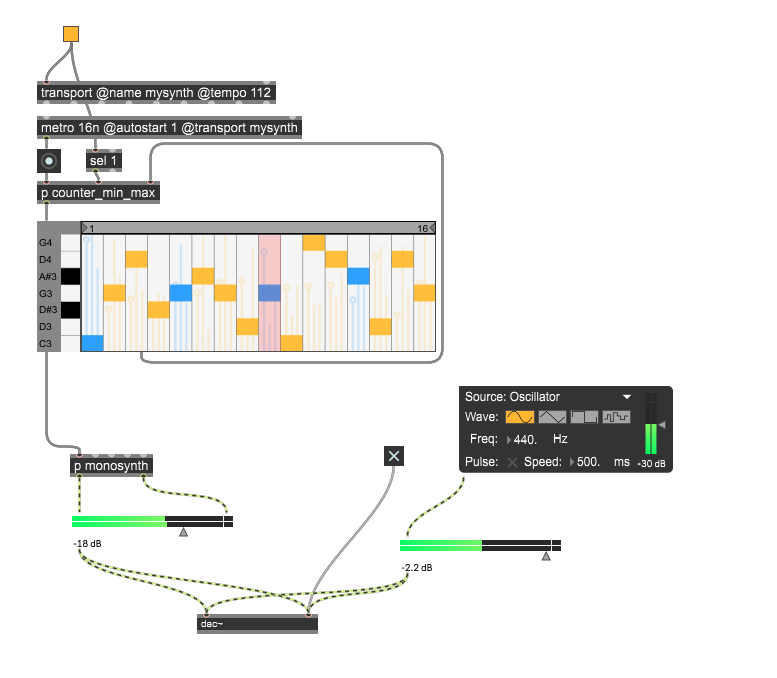

### Question 8

Using faust I created a simple oscillator. I then expanded the control to include a slider for gain and frequency. 
I then created a second oscillator and merged the singlas of both.
Using the zita light tool improves the sound greatly.
This functionality is discribed greatly within the faust quick start tutorial.

```python
import("stdfaust.lib");

freq0 = hslider("[0]freq0",500,1,1000,0.01) : si.smoo;
freq2 = hslider("[0]freq2",500,1,1000,0.01) : si.smoo;

gain0 = hslider("[0]gain0",1,0,1,0.01) : si.smoo;
gain2 = hslider("[2]gain2",1,0,1,0.01) : si.smoo;

process = 
    os.osc(freq0)*gain0,
    os.osc(freq2)*gain2 
    :> _ // merge signals
    <: dm.zita_light; // split to stereo
```

Although faust is really cool and I went though almost every example I can't figure out how to play notes in sequence to create a simple molody. 
Creating noise is easy, creating a pulse is easy, and so is a sawtooth wave. But playing an oscillator and changing its frequncy to a specific value over time is hard.

So far I like Python the most, then Faust, the Max MSP.

### Question 10

In [9]:
import math

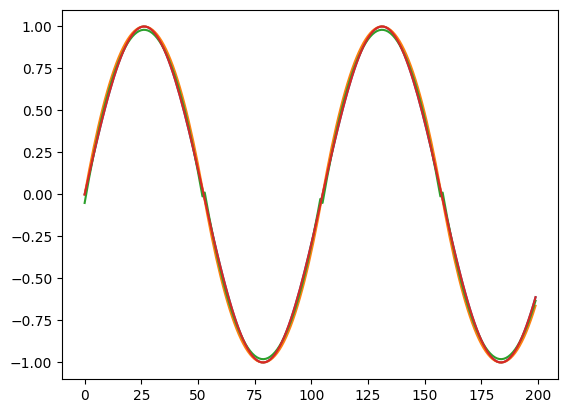

Quadratic abs diff 30.74825082493506
Least Squares abs diff 15.300186627373845
Bhaskara abs diff 0.8557035096994134


##SINEWAVE

##QUADRATIC

##LEAST SQUARES

##BHASKARA

In [10]:
def sinewave(frequency, duration=1, srate=44100):
  t = np.arange(0, duration, 1/srate)
  data = np.sin(2 * np.pi * frequency * t)
  return data

def quadratic(frequency, duration=1, srate=44100):
  t = np.arange(0, duration, 1/srate)
  
  k = 0
  for v in t:

    x = frequency * (2 * np.pi * v) % (np.pi)

    multi = 1

    if frequency * (2 * np.pi * v) % (2 * np.pi) > (np.pi):
      multi *= -1

    t[k] = multi * (((4 * x ) / (math.pi * math.pi)) * (math.pi - x))

    k += 1

  return t


def least_squares(frequency, duration=1, srate=44100):

  t = np.arange(0, duration, 1/srate)
  
  k = 0
  for v in t:

    x = frequency * (2 * np.pi * v) % (np.pi)

    multi = 1

    if frequency * (2 * np.pi * v) % (2 * np.pi) > (np.pi):
      multi *= -1

    t[k] = multi * ((-0.417698 * x * x) + (1.312236 * x) - 0.050465)

    k += 1

  return t

def bhaskara(frequency, duration=1, srate=44100):
  t = np.arange(0, duration, 1/srate)
  
  k = 0
  for v in t:

    x = frequency * (2 * np.pi * v) % (np.pi)

    multi = 1

    if frequency * (2 * np.pi * v) % (2 * np.pi) > (np.pi):
      multi *= -1

    t[k] = multi * (16 * x * (math.pi - x)) / ((5 * math.pi * math.pi) - (4 * x * (math.pi - x)))

    k += 1

  return t

freq = 420

data_sinewave = sinewave(freq)
data_quadratic = quadratic(freq)
data_least_squares = least_squares(freq)
data_bhaskara = bhaskara(freq)

plt.plot(data_sinewave[:200])

plt.plot(data_quadratic[:200])

plt.plot(data_least_squares[:200])

plt.plot(data_bhaskara[:200])

plt.show()

diff_quadratic = np.absolute(data_sinewave[:1024] - data_quadratic[:1024])
diff_least_squares = np.absolute(data_sinewave[:1024] - data_least_squares[:1024])
diff_bhaskara = np.absolute(data_sinewave[:1024] - data_bhaskara[:1024])

print('Quadratic abs diff', sum(diff_quadratic))
print('Least Squares abs diff', sum(diff_least_squares))
print('Bhaskara abs diff', sum(diff_bhaskara))

IPython.display.display(IPython.display.Markdown(data="##SINEWAVE"))
IPython.display.display(IPython.display.Audio(data_sinewave, rate=44100))

IPython.display.display(IPython.display.Markdown(data="##QUADRATIC"))
IPython.display.display(IPython.display.Audio(data_quadratic, rate=44100))

IPython.display.display(IPython.display.Markdown(data="##LEAST SQUARES"))
IPython.display.display(IPython.display.Audio(data_least_squares, rate=44100))

IPython.display.display(IPython.display.Markdown(data="##BHASKARA"))
IPython.display.display(IPython.display.Audio(data_bhaskara, rate=44100))

From testing listing to a 420 hz audio sample Bhaskara approximation sounds the best.
From the current way I approximated the sinewaves they have a linear cost in memory with respect to the sampling rate and duration.
If I used a asynchronous buffering method there would be no sustained memory requirements but would require cpu calculation of the signal for each sampled frame evertime the callback function is made.
A wave table could be made of each approximation to reduce the amount of cpu usage during the callback function, but this would increase memory use.